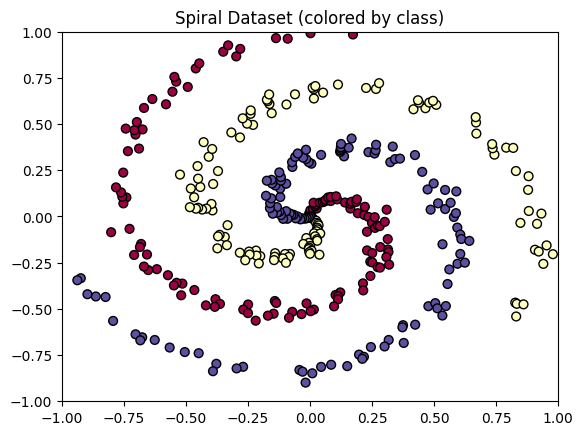

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Spiral Dataset (colored by class)'}>)

In [2]:
import torch
from toydata import ToyData

data = ToyData(num_classes=3)
x_train, y_train, x_test, y_test = data.load_data()

data.plot_spiraldata()

In [5]:
print(x_train[:10])
print(y_train[:10])

[[-0.25429192  0.2798821 ]
 [ 0.7435626  -0.17857705]
 [-0.0236278  -0.7727481 ]
 [ 0.64086914 -0.53047043]
 [-0.02091075 -0.47853494]
 [ 0.28706297  0.49409056]
 [ 0.00616916  0.03304248]
 [-0.308938    0.55896163]
 [-0.23304963  0.3188725 ]
 [-0.10114413  0.07522349]]
[2 2 3 2 0 2 0 1 2 3]


In [3]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [4]:
class Model(nn.Module):

    def __init__(self, num_neurons, num_classes):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(2, num_neurons)
        self.linear2 = nn.Linear(num_neurons, num_classes, bias=False)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        return self.linear2(x)

In [5]:
def accuracy(predict, truth):
    return torch.sum(torch.argmax(predict, axis=1)==truth)/predict.size()[0]

In [6]:
model = Model(15, 3)
learning_rate = 1E-3
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [7]:
epoch = 10000
batch_size = 50
for epoch_cnt in range(epoch):
    idxs = np.arange(len(x_train))
    np.random.shuffle(idxs)

    for batch_cnt in range(0, len(x_train) // batch_size):
        batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]
        batch = torch.tensor(x_train[batch_indices])
        truth = torch.tensor(y_train[batch_indices])

        prediction = model(batch)
        
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(prediction, truth)
        loss.backward()
        optimizer.step()

        acc = float(accuracy(prediction, truth))
        print(acc)
        

0.41999998688697815
0.3199999928474426
0.3400000035762787
0.25999999046325684
0.3400000035762787
0.3199999928474426
0.36000001430511475
0.20000000298023224
0.4000000059604645
0.3799999952316284
0.36000001430511475
0.30000001192092896
0.41999998688697815
0.36000001430511475
0.3199999928474426
0.3199999928474426
0.4000000059604645
0.18000000715255737
0.3199999928474426
0.25999999046325684
0.3799999952316284
0.41999998688697815
0.30000001192092896
0.3199999928474426
0.3400000035762787
0.3400000035762787
0.36000001430511475
0.30000001192092896
0.4000000059604645
0.25999999046325684
0.30000001192092896
0.36000001430511475
0.2800000011920929
0.3799999952316284
0.3199999928474426
0.36000001430511475
0.36000001430511475
0.3199999928474426
0.4399999976158142
0.2199999988079071
0.2800000011920929
0.3799999952316284
0.2199999988079071
0.47999998927116394
0.30000001192092896
0.30000001192092896
0.46000000834465027
0.36000001430511475
0.3799999952316284
0.3400000035762787
0.36000001430511475
0.3799

/usr/local/lib/python3.8/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


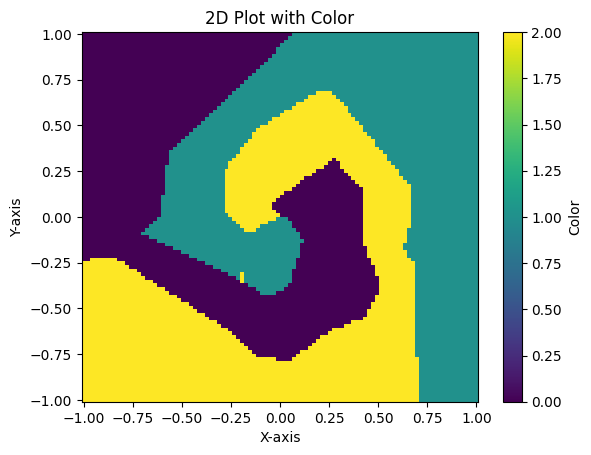

In [8]:
import matplotlib.pyplot as plt
x_grid = torch.linspace(-1, 1, 100)
y_grid = torch.linspace(-1, 1, 100)

x_grid, y_grid = torch.meshgrid(x_grid, y_grid)
color = []
for i in range(len(x_grid)):
    tmp = []
    for j in range(len(y_grid)):
        pair = torch.cat((x_grid[i][j].unsqueeze(0), y_grid[i][j].unsqueeze(0)))
        output = model(pair)
        output = int(torch.argmax(output))
        tmp.append(output)
    color.append(tmp)

plt.pcolormesh(x_grid, y_grid, color, shading='auto', cmap='viridis')
plt.colorbar(label='Color')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Plot with Color')
plt.show()

In [155]:
output = model(torch.tensor([1., 1.]))
output = int(torch.argmax(output))
print(output)

1
